In [1]:
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import certifi
import json
import pandas as pd

def get_exec_comp(symbol):
    url = ("https://financialmodelingprep.com/api/v4/governance/executive_compensation?symbol="+symbol+"&apikey="+api_key)
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    df = pd.DataFrame(json.loads(data))
    return df


In [10]:
large_cap_tickers = [
            # Technology
            "AAPL",  # Apple Inc.
            "AMZN",  # Amazon.com, Inc.
            "GOOGL", # Alphabet Inc.
            "META",    # Meta Platforms, Inc.
            "TSLA",  # Tesla, Inc.
            # Healthcare
            "JNJ",   # Johnson & Johnson
            "PFE",   # Pfizer Inc.
            # Consumer Goods
            "KO",    # Coca-Cola Company
            "PEP",   # PepsiCo, Inc.
            "NKE",   # NIKE, Inc.
            # Energy
            "CVX",   # Chevron Corporation
            # Financial Services
            "GS",
            "JPM",   # JPMorgan Chase & Co.
        ]

### Executive Compensation Data

In [51]:
get_exec_comp("GS").drop_duplicates('nameAndPosition')

C:\Users\Roman\AppData\Local\Temp\ipykernel_5072\3237853788.py:16: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


,cik,symbol,companyName,industryTitle,filingDate,acceptedDate,nameAndPosition,year,salary,bonus,stock_award,incentive_plan_compensation,all_other_compensation,total,url
0,0000886982,GS,"The Goldman Sachs Group, Inc.","SECURITY BROKERS, DEALERS & FLOTATION COMPANIES",2022-03-18,2022-03-18 11:02:14,David Solomon Chairman and CEO,2021,2000000,9900000,27380180,0,264892,39545072,https://www.sec.gov/Archives/edgar/data/886982...
24,0000886982,GS,"The Goldman Sachs Group, Inc.","SECURITY BROKERS, DEALERS & FLOTATION COMPANIES",2022-03-18,2022-03-18 11:02:14,John Waldron President and COO,2021,1850000,12460000,20879205,0,319593,35508798,https://www.sec.gov/Archives/edgar/data/886982...
48,0000886982,GS,"The Goldman Sachs Group, Inc.","SECURITY BROKERS, DEALERS & FLOTATION COMPANIES",2022-03-18,2022-03-18 11:02:14,Stephen Scherr CFO (Retired) *,2021,1850000,10460000,7800899,0,259799,20370698,https://www.sec.gov/Archives/edgar/data/886982...
72,0000886982,GS,"The Goldman Sachs Group, Inc.","SECURITY BROKERS, DEALERS & FLOTATION COMPANIES",2022-03-18,2022-03-18 11:02:14,Philip Berlinski Global Treasurer,2021,1108046,6556898,6341994,0,2908899,16967355,https://www.sec.gov/Archives/edgar/data/886982...
80,0000886982,GS,"The Goldman Sachs Group, Inc.","SECURITY BROKERS, DEALERS & FLOTATION COMPANIES",2022-03-18,2022-03-18 11:02:14,Kathryn Ruemmler CLO and General Counsel,2021,1500000,6400000,4731963,0,63358,12695321,https://www.sec.gov/Archives/edgar/data/886982...


### Distribution of Executive Compensation

C:\Users\Roman\AppData\Local\Temp\ipykernel_5072\3237853788.py:16: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


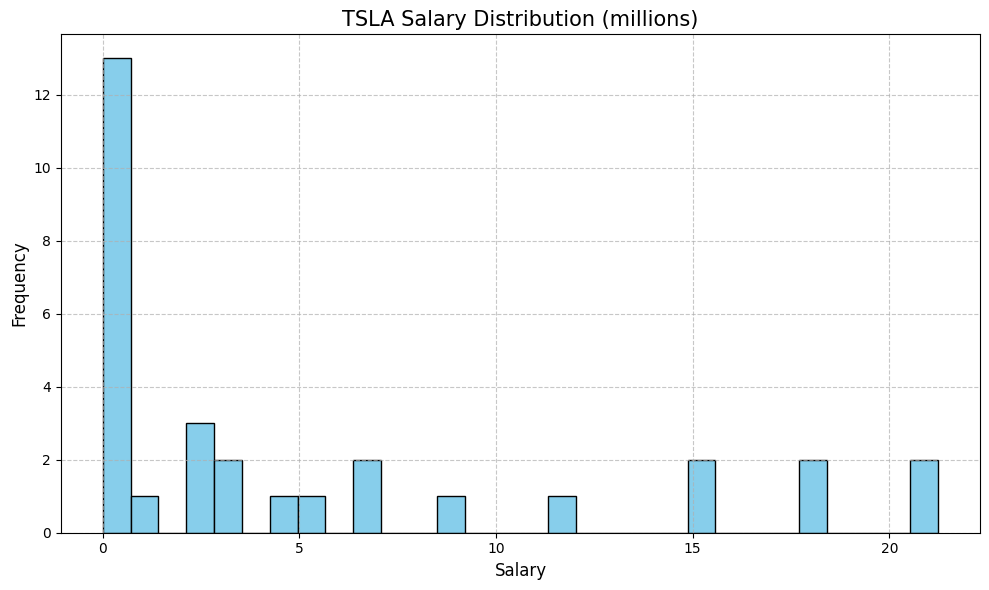

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(get_exec_comp("TSLA").drop_duplicates('nameAndPosition')['total']/1000000, bins=30, color='skyblue', edgecolor='black')

# Enhancing the plot
plt.title('TSLA Salary Distribution (millions)', fontsize=15)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### Sort by Current Data, Drop Duplicates, Find Highest Comp Value

In [54]:
get_exec_comp("GS").sort_values(by='year', ascending=False).drop_duplicates("nameAndPosition").sort_values(by='total', ascending=False).iloc[0]

C:\Users\Roman\AppData\Local\Temp\ipykernel_5072\3237853788.py:16: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


cik                                                                   0000886982
symbol                                                                        GS
companyName                                        The Goldman Sachs Group, Inc.
industryTitle                    SECURITY BROKERS, DEALERS & FLOTATION COMPANIES
filingDate                                                            2022-03-18
acceptedDate                                                 2022-03-18 11:02:14
nameAndPosition                                   David Solomon Chairman and CEO
year                                                                        2021
salary                                                                   2000000
bonus                                                                    9900000
stock_award                                                             27380180
incentive_plan_compensation                                                    0
all_other_compensation      

### Return the Highest Comp for an Executive at a Given Company for a Given Year

In [55]:
def get_latest_highest(stock, comp, year):
    return get_exec_comp(stock)[get_exec_comp(stock)['year'] == year].drop_duplicates("nameAndPosition").sort_values(by=comp, ascending=False).iloc[0]

In [58]:
get_latest_highest('TSLA', 'total', 2021)

C:\Users\Roman\AppData\Local\Temp\ipykernel_5072\3237853788.py:16: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


cik                                                                   0001318605
symbol                                                                      TSLA
companyName                                                          Tesla, Inc.
industryTitle                              MOTOR VEHICLES & PASSENGER CAR BODIES
filingDate                                                            2023-04-06
acceptedDate                                                 2023-04-06 16:36:19
nameAndPosition                Andrew Baglino  SVP, Powertrain and Energy Eng...
year                                                                        2021
salary                                                                    301154
bonus                                                                          0
stock_award                                                                    0
incentive_plan_compensation                                                    0
all_other_compensation      

### Do Higher Stock Awards Correlate with Higher Stock Prices/Returns?

In [15]:
import yfinance as yf
import pandas as pd

# Define the stock symbols

# Define the time period
start_date = '2021-01-01'
end_date = '2022-01-01'

# Download the stock data
stock_data = yf.download(large_cap_tickers, start=start_date, end=end_date)

stock_data.head()

[*********************100%%**********************]  13 of 13 completed


Adj Close                                                \
                  AAPL        AMZN        CVX      GOOGL          GS   
Date                                                                   
2021-01-04  127.164177  159.331497  74.755318  86.306503  245.939209   
2021-01-05  128.736389  160.925507  76.776199  87.002502  251.442688   
2021-01-06  124.402931  156.919006  79.247154  86.143997  265.011108   
2021-01-07  128.647949  158.108002  79.617805  88.717003  270.672302   
2021-01-08  129.758347  159.134995  80.376732  89.891502  269.215271   

                                                                       ...  \
                   JNJ         JPM         KO        META         NKE  ...   
Date                                                                   ...   
2021-01-04  144.364075  114.875862  48.158409  268.940002  135.820648  ...   
2021-01-05  146.061371  115.500938  47.629002  270.970001  136.916168  ...   
2021-01-06  147.435837  120.924377  46.113785  263.309998  138.001938  ...   
2021-01-07  147.933960  124.895439  45.602623  268.739990  140.522522  ...   
2021-01-08  147.629532  125.033348  46.624943  267.570007  141.879761  ...   

              Volume                                                   \
               GOOGL       GS       JNJ       JPM        KO      META   
Date                                                                    
2021-01-04  37324000  3572000  11765900  16819900  25611100  15106100   
2021-01-05  20360000  4207100   9602300  13731200  20323800   9871600   
2021-01-06  46588000  6383500   8230100  24909100  38724500  24354100   
2021-01-07  41936000  4009700   7747200  21940400  53225700  15789800   
2021-01-08  35484000  2800800   8228900  12035100  29674000  18528300   

                                                   
                NKE      PEP       PFE       TSLA  
Date                                               
2021-01-04  6178500  7486900  33565700  145914600  
2021-01-05  4163100  4126000  29909400   96735600  
2021-01-06  6072900  4843300  34962500  134100000  
2021-01-07  5256900  4473200  27809500  154496700  
2021-01-08  3950500  4312000  33462400  225166500  

[5 rows x 78 columns]

In [16]:
r_2021 = (stock_data.iloc[-1] - stock_data.iloc[0])/stock_data.iloc[0]

In [33]:
p_2021 = stock_data.iloc[-1]

### Stock Return and Exec Compensation

In [59]:
fr = []
p = []
stock_comp = []
total_comp = []
for ticker in r_2021['Adj Close'].reset_index()['index'].values:
    fr.append(r_2021['Adj Close'][ticker])
    p.append(p_2021['Adj Close'][ticker])
    stock_comp.append(get_latest_highest(ticker, 'stock_award', 2021)['stock_award'])
    total_comp.append(get_latest_highest(ticker, 'total', 2021)['total'])
    print('Done!')

C:\Users\Roman\AppData\Local\Temp\ipykernel_5072\3237853788.py:16: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!


### Visualizing Firm Return and Stock Compensation

C:\Users\Roman\AppData\Local\Temp\ipykernel_5072\742018010.py:9: RuntimeWarning: divide by zero encountered in log
  plt.scatter(fr, np.log(stock_comp), color='blue', edgecolor='black', s=50)


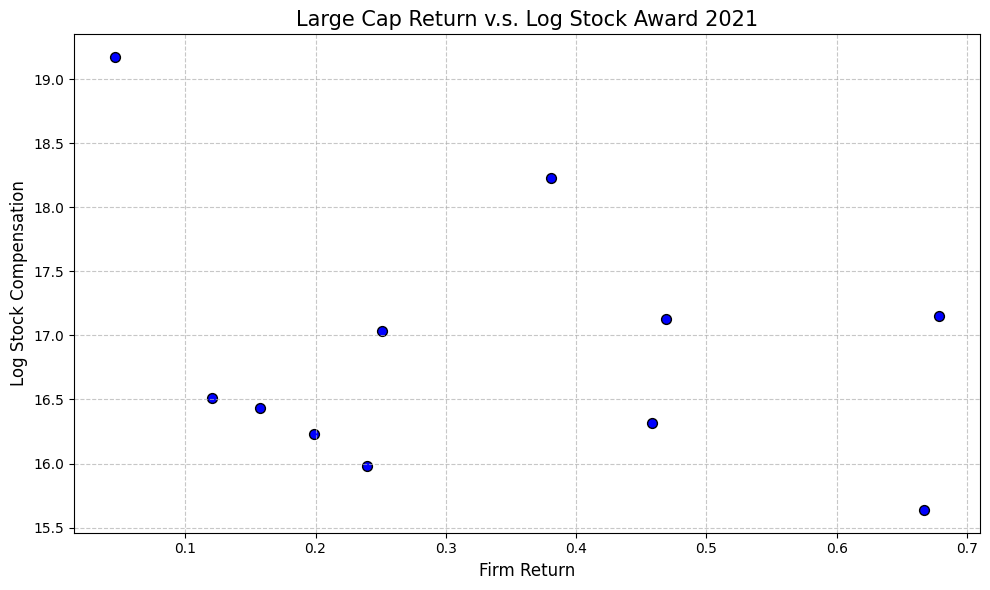

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and it has 'salary' and 'stock_return' columns
# df = pd.read_csv('your_data.csv')  # Replace with your data source

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(fr, np.log(stock_comp), color='blue', edgecolor='black', s=50)

# Enhancing the plot
plt.title('Large Cap Return v.s. Log Stock Award 2021', fontsize=15)
plt.xlabel('Firm Return', fontsize=12)
plt.ylabel('Log Stock Compensation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### Do Firms with a Higher Stock Price Distribute More Stock Awards?

C:\Users\Roman\AppData\Local\Temp\ipykernel_5072\3250023580.py:9: RuntimeWarning: divide by zero encountered in log
  plt.scatter(p, np.log(stock_comp), color='blue', edgecolor='black', s=50)


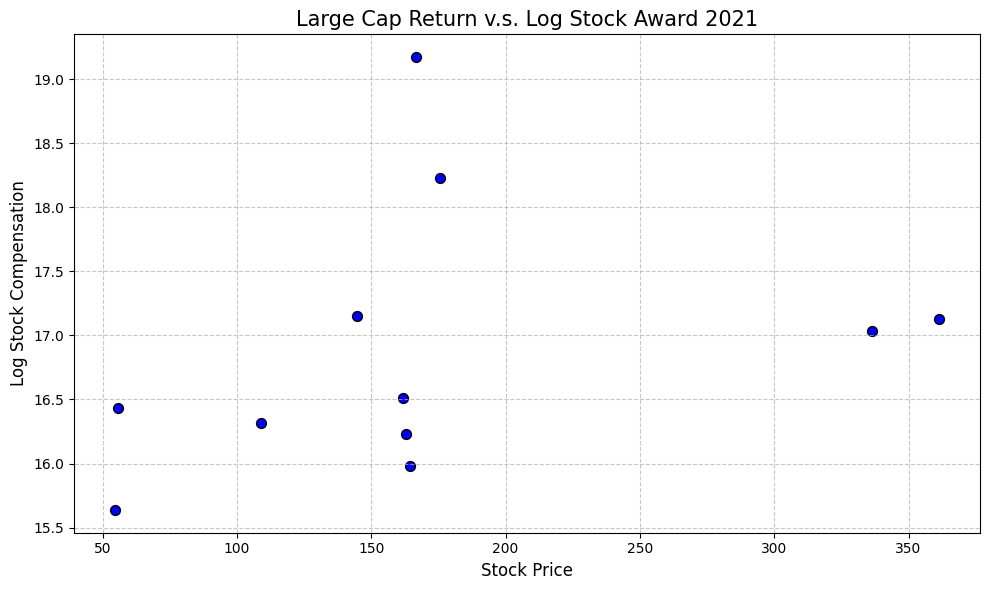

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and it has 'salary' and 'stock_return' columns
# df = pd.read_csv('your_data.csv')  # Replace with your data source

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(p, np.log(stock_comp), color='blue', edgecolor='black', s=50)

# Enhancing the plot
plt.title('Large Cap Return v.s. Log Stock Award 2021', fontsize=15)
plt.xlabel('Stock Price', fontsize=12)
plt.ylabel('Log Stock Compensation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### Stock Price and Total Compensation

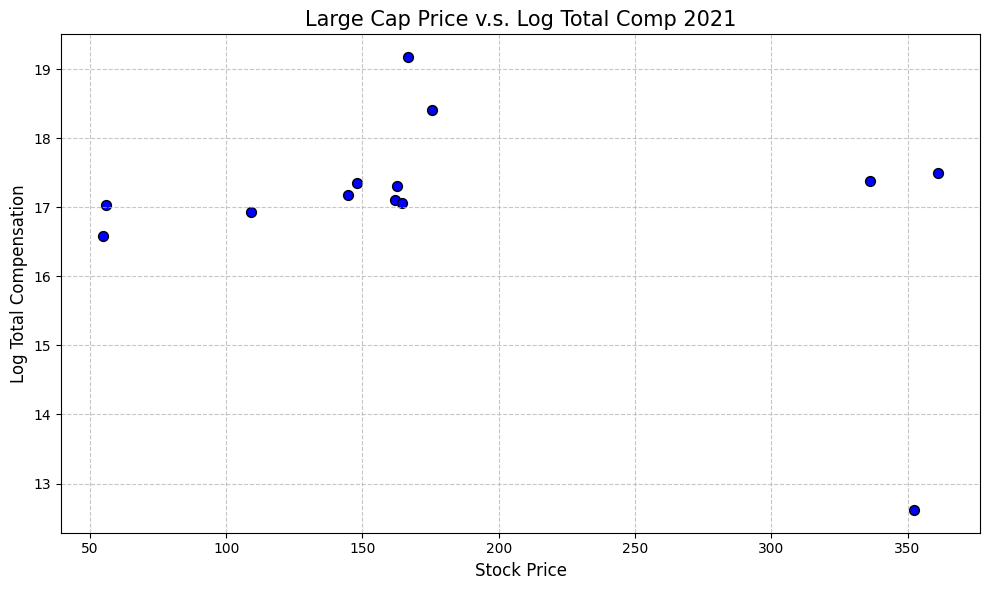

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and it has 'salary' and 'stock_return' columns
# df = pd.read_csv('your_data.csv')  # Replace with your data source

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(p, np.log(total_comp), color='blue', edgecolor='black', s=50)

# Enhancing the plot
plt.title('Large Cap Price v.s. Log Total Comp 2021', fontsize=15)
plt.xlabel('Stock Price', fontsize=12)
plt.ylabel('Log Total Compensation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### Stock Return and Total Compensation

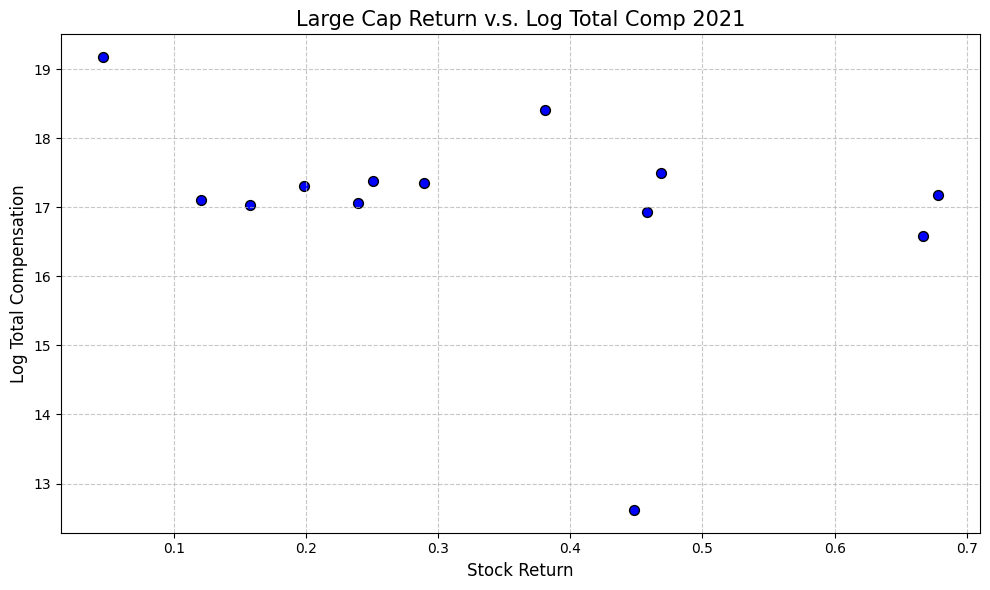

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and it has 'salary' and 'stock_return' columns
# df = pd.read_csv('your_data.csv')  # Replace with your data source

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(fr, np.log(total_comp), color='blue', edgecolor='black', s=50)

# Enhancing the plot
plt.title('Large Cap Return v.s. Log Total Comp 2021', fontsize=15)
plt.xlabel('Stock Return', fontsize=12)
plt.ylabel('Log Total Compensation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()